In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm, LinearSegmentedColormap

In [2]:
import visualizer
import dataparser

In [3]:
df = pd.read_csv("QF_S_PARSED.csv")

In [4]:
df["task-clock:u"] = df["task-clock:u"].astype(float)
df

,Unnamed: 0,problem,solver,status,sanity_sat,task-clock:u,context-switches:u,cpu-migrations:u,page-faults:u,cycles:u,...,branches:u,branch-misses:u,slots:u,topdown-retiring:u,topdown-bad-spec:u,topdown-fe-bound:u,topdown-be-bound:u,elapsed,user,sys
0,0,20240318-omark_lyndon-schuetzenberg-2,z3noodler,Success,unsat,17.51,0.0,0.0,2709.0,3.999192e+07,...,1.629039e+07,1.780660e+05,1.999156e+08,7.823070e+07,1.958755e+07,6.361164e+07,3.992855e+07,0.018525,0.010643,0.007452
1,1,20240318-omark_noodles-unsat,cvc5,Success,cvc5 interrupted by timeout.,60003.68,0.0,0.0,26675.0,2.146129e+11,...,6.821439e+10,3.931674e+08,1.072613e+12,3.163948e+11,3.996010e+11,9.993199e+10,4.036055e+11,61.226493,59.783566,0.048857
2,2,20240318-omark_parikh,ostrich,Success,unknown,133282.05,0.0,0.0,367651.0,4.453690e+11,...,1.401856e+11,1.647239e+09,1.990056e+12,4.954338e+11,1.049200e+12,2.505056e+11,5.836024e+11,60.288814,127.788855,5.047625
3,3,20240318-omark_noodles-unsat-6,z3noodler,Success,timeout,60002.26,0.0,0.0,964941.0,2.104828e+11,...,5.680298e+10,7.855246e+07,1.050888e+12,4.186897e+11,3.667804e+11,1.407981e+10,3.936246e+11,60.009265,58.541398,1.365235
4,4,20240318-omark_noodles-unsat-8,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75755,75755,queries-no-ree_query3574,ostrich,Success,sat,3263.32,0.0,0.0,28995.0,1.005769e+10,...,2.325929e+09,6.998051e+07,4.524896e+10,8.493112e+09,2.444141e+10,1.021312e+10,1.056403e+10,1.010327,2.927523,0.402496
75756,75756,queries-no-ree_query3450,cvc5,Success,sat,71.74,0.0,0.0,1264.0,2.432433e+08,...,6.818224e+07,1.791506e+06,1.216192e+09,3.529874e+08,2.336997e+08,4.769694e+08,1.526756e+08,0.073158,0.065992,0.005993
75757,75757,queries-no-ree_query3516,ostrich,Success,sat,2581.70,0.0,0.0,29789.0,7.908598e+09,...,2.104755e+09,6.593058e+07,3.812858e+10,7.429565e+09,2.546560e+10,9.140415e+09,5.721529e+09,0.958888,2.316515,0.321057
75758,75758,queries-no-ree_query10650,z3alpha,Success,sat,57.85,0.0,0.0,6226.0,1.519642e+08,...,5.163598e+07,1.119131e+06,7.591048e+08,2.115894e+08,1.646719e+08,2.520233e+08,1.433909e+08,0.066438,0.041962,0.016503


In [5]:
pivot_df = df.pivot(index='problem', columns='solver', values='elapsed')

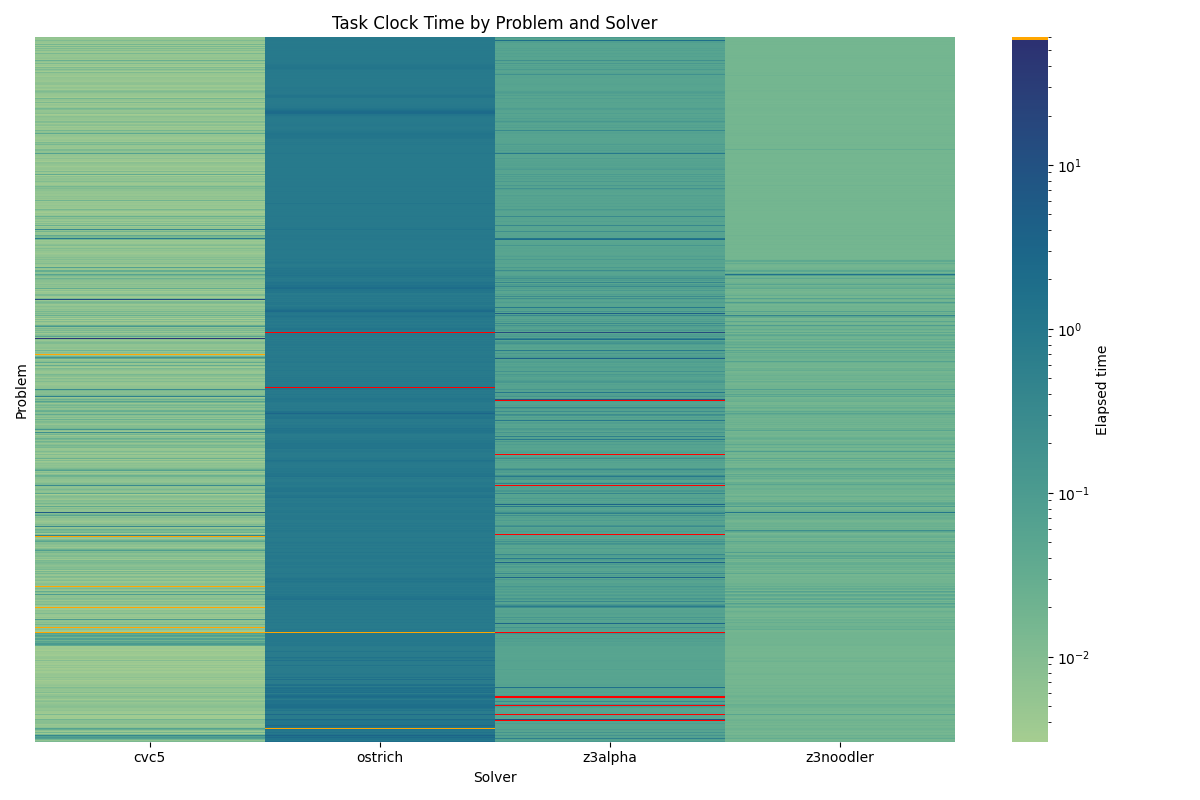

In [6]:
%matplotlib widget
# Original colormap
base_cmap = sns.color_palette("crest", as_cmap=True)

# Create a new colormap by interpolating the original and adding a color for values above 60
colors = base_cmap(np.linspace(0, 1, 256))  # Get the original colors
custom_colors = np.vstack([colors, [1, 0.65, 0, 1]]) 
custom_cmap = ListedColormap(custom_colors)
custom_cmap.set_bad(color="red")

# LogNorm setup with a custom colormap boundary for 60
log_norm = LogNorm()

# Mask values above 60 to apply the custom color
#masked_data = np.where(pivot_df > 60, 60, pivot_df)
pivot_df = pivot_df.clip(upper=60)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cbar_kws={'label': 'Elapsed time'},
    cmap=custom_cmap,
    norm=log_norm,
)

# Title and labels
plt.title('Task Clock Time by Problem and Solver')
plt.xlabel('Solver')
plt.ylabel('Problem')

plt.yticks([])
plt.xticks()


plt.tight_layout()

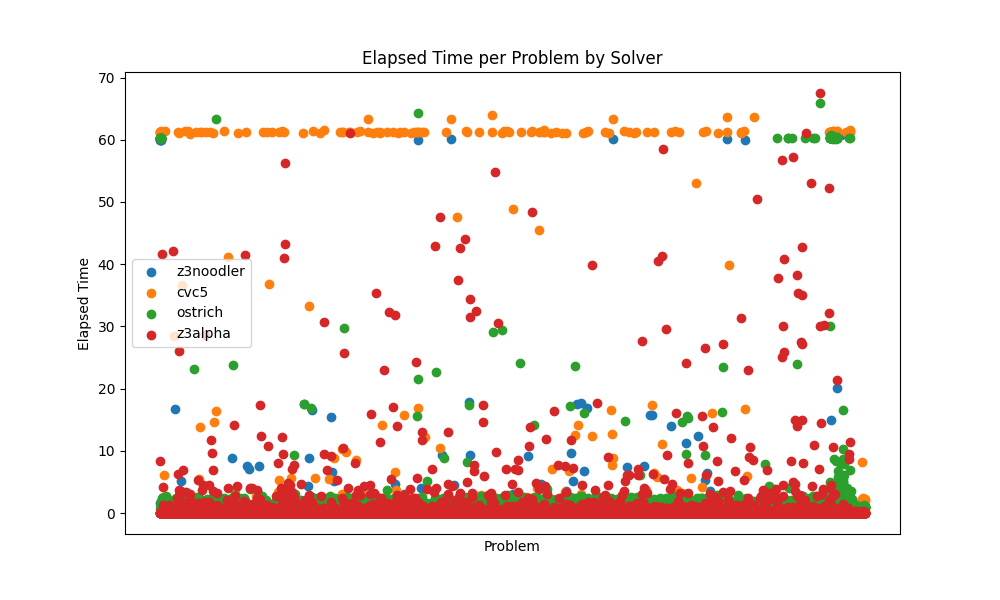

In [17]:
%matplotlib widget
plt.figure(figsize=(10, 6))
for solver in df['solver'].unique():
    subset = df[df['solver'] == solver]
    plt.scatter(subset['problem'], subset['elapsed'], label=solver)

plt.xlabel('Problem')
plt.ylabel('Elapsed Time')
plt.title('Elapsed Time per Problem by Solver')
plt.legend()
plt.xticks([])  # Rotate x-axis labels if they overlap
plt.show()

In [8]:
ostrich = df[df["solver"] == "ostrich"]
cvc = df[df["solver"] == "cvc5"]
noodler = df[df["solver"] == "z3noodler"]
alpha = df[df["solver"] == "z3alpha"]

In [9]:
print(ostrich.shape)
print(cvc.shape)
print(noodler.shape)
print(alpha.shape)

(18940, 21)
(18940, 21)
(18940, 21)
(18940, 21)


In [10]:
alpha.loc[~df['sanity_sat'].isin(["sat", "unsat"])]

,Unnamed: 0,problem,solver,status,sanity_sat,task-clock:u,context-switches:u,cpu-migrations:u,page-faults:u,cycles:u,...,branches:u,branch-misses:u,slots:u,topdown-retiring:u,topdown-bad-spec:u,topdown-fe-bound:u,topdown-be-bound:u,elapsed,user,sys
4,4,20240318-omark_noodles-unsat-8,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,20240318-omark_noodles-unsat-6,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,20240318-omark_lyndon-schuetzenberg-3,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,20240318-omark_lyndon-schuetzenberg-1,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,20240318-omark_noodles-unsat,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72787,72787,track02_02_track_3,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73055,73055,track04_04_track_170,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73097,73097,track04_04_track_179,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73131,73131,track04_04_track_14,z3alpha,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
reduced_df = df[["solver", "problem", "sanity_sat", "task-clock:u", "elapsed", "status"]]
#reduced_df = reduced_df[reduced_df["elapsed"] < 60]

In [12]:
pivoted = reduced_df.pivot_table(index='problem', columns='solver', values='sanity_sat', aggfunc='first')

In [13]:
pivoted.loc[pivoted.nunique(axis=1) > 1]

solver,cvc5,ostrich,z3alpha,z3noodler
problem,,,,
20230329-automatark-lu_instance01626,cvc5 interrupted by timeout.,NaN,sat,sat
20230329-automatark-lu_instance06264,cvc5 interrupted by timeout.,unsat,unsat,unsat
20230329-automatark-lu_instance06273,cvc5 interrupted by timeout.,unsat,NaN,unsat
20230329-automatark-lu_instance06362,cvc5 interrupted by timeout.,unsat,NaN,unsat
20230329-automatark-lu_instance06390,cvc5 interrupted by timeout.,unsat,NaN,unsat
...,...,...,...,...
track03_03_track_82,sat,unknown,sat,sat
track03_03_track_83,sat,unknown,sat,sat
track03_03_track_84,sat,unknown,sat,sat


In [14]:
s = df[df["solver"] == "ostrich"]
s[s["problem"] == "20230329-automatark-lu_instance01626"]

,Unnamed: 0,problem,solver,status,sanity_sat,task-clock:u,context-switches:u,cpu-migrations:u,page-faults:u,cycles:u,...,branches:u,branch-misses:u,slots:u,topdown-retiring:u,topdown-bad-spec:u,topdown-fe-bound:u,topdown-be-bound:u,elapsed,user,sys
17724,17724,20230329-automatark-lu_instance01626,ostrich,Timeout,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
